In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=24)

client = Client(cluster)
client


Client Scheduler: tcp://127.0.0.1:34629 Dashboard: http://127.0.0.1:8888/status,Cluster Workers: 2 Cores: 4 Memory: 35.01 GB


In [5]:
import sys, glob
import numpy as np
import xarray as xr
import time
import zarr
import matplotlib.pyplot as plt


In [22]:
def check_zarr(zarrdir,var,sort):
    print(zarrdir)
    ds=xr.open_zarr(zarrdir)
    print(str(np.around(ds[var].nbytes/1e9))+ ' GB of data')
    if sort == 'True':
        ds_sorted=ds.sortby('time_counter')
        fig=plt.figure(figsize=(15,12))
        ds_sorted[var][0].plot()
        fig=plt.figure(figsize=(15,5))
        ds_sorted[var][:,3000,4000].plot()
    else:
        fig=plt.figure(figsize=(15,12))
        ds[var][0].plot()
        fig=plt.figure(figsize=(15,5))
        ds[var][:,3000,4000].plot()
            

/mnt/meom/workdir/albert/eNATL60/zarr/eNATL60-BLBT02-SSH-1h
1847.0 GB of data


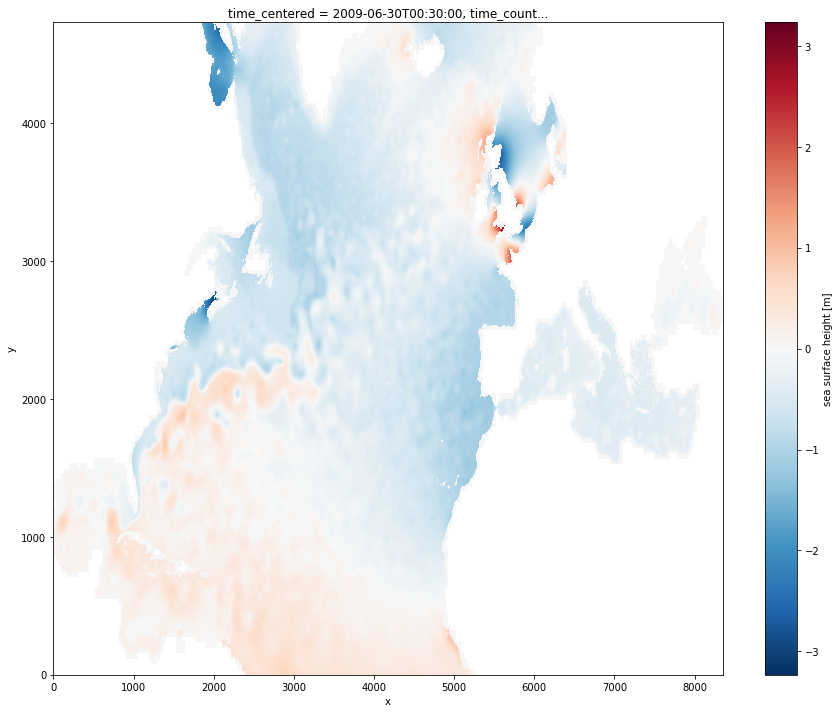

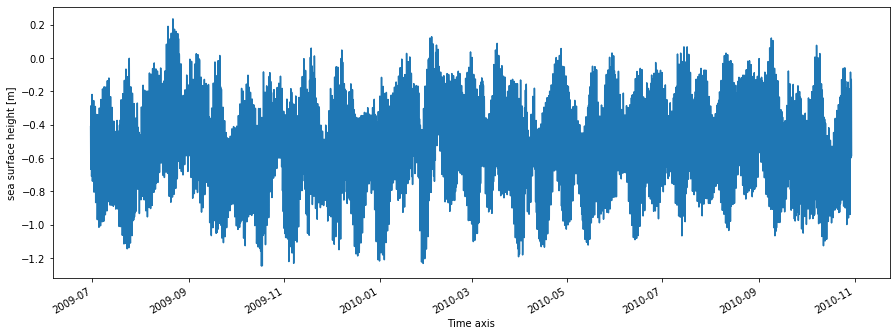

In [23]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002-SSH-1h','sossheig','True')

In [ ]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h','sossheig','True')

In [ ]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h-bis','sossheig','True')

In [ ]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLBT02-SSH-1h','sossheig','True')